In [1]:
from sharad import *
regions = "/data/SciBigData/radargrams/regions.gpkg"
layer = "regions"

# load all the sharad tracks
alltracks = "/run/media/luca/data/Code/planmap-notebooks-code.git/sharad_processing/data/alltracks/"
tracks=GeoDataFrame.from_file(alltracks)
# set the right crs for the tracks, latlong mars2000
tracks.crs = fiona.crs.from_string("+proj=longlat +a=3396190 +b=3376200 +no_defs")




# plot region(s) + all the tracks example

(-161564.55805862596, -118896.86676361252)

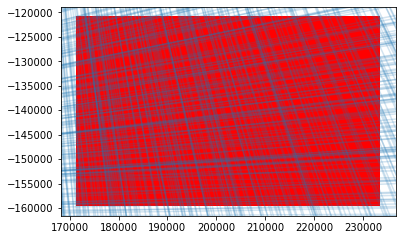

In [2]:
# load the regions of interest
regs_ = GeoDataFrame.from_file(regions, layer=layer)
# set the right crs, north pole stereo this time
regs_.crs = fiona.crs.from_string("+proj=stere +lat_0=90 +lon_0=0 +k=1 +x_0=0 +y_0=0 +a=3396190 +b=3376200 +units=m +no_defs")

# reproject the regions to the same crs as the tracks
regs = regs_.to_crs(tracks.crs)
ax = regs_.plot(color="red") # display the region and some tracks
xlim_ = ax.get_xlim()
ylim_ = ax.get_ylim()

tracks.to_crs(regs_.crs).plot(ax=ax, alpha=0.2)
ax.set_xlim(xlim_)
ax.set_ylim(ylim_)

# now perform intersections

(-250000, 0)

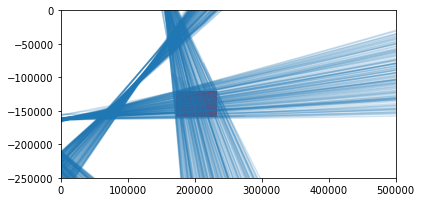

In [3]:
inttrack = tracks[tracks.intersects(regs.geometry[0])] # get only tracks intersecting the regs geometry, using intersects
ax = regs_.plot(color="red") # display the region and some tracks
ax = inttrack.to_crs(regs_.crs).plot(ax=ax, alpha=0.2)
ax.set_xlim(0, 500000)
ax.set_ylim(-250000,0)
# the tracks are not cut at the size of the region:

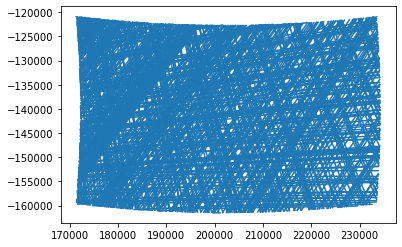

In [4]:
# now cut them using intersection:
inttracks = inttrack.intersection(regs.geometry[0])
inttracks.to_crs(regs_.crs).plot()

inttracks.to_file("intersecting") # save them to a shapefile

# write a csv with all the tracks ids

In [5]:
iid = inttrack.track_id
iid.to_csv("ids_to_download.csv")

<ipython-input-5-a433309bf8c1>:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  iid.to_csv("ids_to_download.csv")


# now select a subset of tracks we are interested in by randomly choosing them

In [8]:
from sharad import *
import logging as log
log.getLogger().setLevel(log.INFO)

np.random.seed(245)
ids = np.loadtxt("ids_to_download.csv", delimiter=",", dtype=str)[:,1] # or just use the iid variable

rids = np.random.choice(ids, 2).astype(str)


download_data_fot_sharad_id(rids, "newdataset", exclude=['RGRAM_IMG', 'RGRAM_LBL', 'JPG_LBL' ])

AttributeError: 'LineString' object has no attribute 'x'

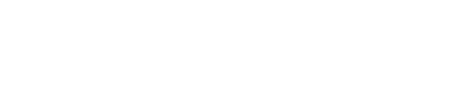

In [14]:
import geoplot
ax = geoplot.kdeplot(
    tracks,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [13]:
pip install geoplot --user


  Using cached https://files.pythonhosted.org/packages/a0/40/40c264002dfba4736f35c3524f6a0e7a03458fb4fcc436ce501f541359b7/geoplot-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/e0/fd2f860ac34c97c1370514a1fa37d33c46dca5bea8a6f49dc167fbffbc1f/contextily-1.0rc2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/91/b5/6b54f40901d89f2ce30cf2d8110dd57658db3e95db79baba6706d7588691/mapclassify-2.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/9d/1d/80d28ba17e4647bf820e8d5f485d58f9da9c5ca424450489eb49e325ba66/mercantile-1.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/80/93/d384479da0ead712bdaf697a8399c13a9a89bd856ada5a27d462fb45e47b/geopy-1.20.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f6/89/62912e01f3cede11edcc0abf81298e3439d9c06c8dce644369380ed13f6d/Deprecated-1.2.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8b/62/26ec95a98b